In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

synthetic = pd.read_csv('synthetic_dataset.csv')

In [2]:
print(len(synthetic))

50


Final Weight Vector (PLA): [27.         21.49134593 20.55368609]
Missclassified Point:  0


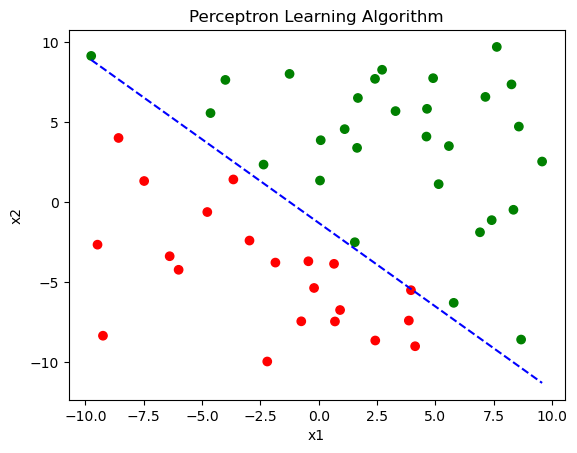

In [3]:
data = np.array(synthetic)

X = data[:, :-1]
y = data[:, -1]

X = np.column_stack((np.ones(len(X)), X))
w = np.zeros(X.shape[1])
max_iter = 1000

def pla(X, Y, w, max_iter):
    for i in range(max_iter):
        misclassifies = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]
                misclassifies += 1
        if misclassifies == 0:
            break
    return misclassifies, w

mis, result = pla(X, y, w, max_iter)

print("Final Weight Vector (PLA):", result)
print("Missclassified Point: ", mis)

# Plot the dataset and decision boundary
plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "green"))(y))
x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-result[1] * x_decision - result[0]) / result[2]
plt.plot(x_decision, y_decision, linestyle="dashed", color="blue")
plt.title("Perceptron Learning Algorithm")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Final Weight Vector (Pocket Algorithm): [27.         21.49134593 20.55368609]


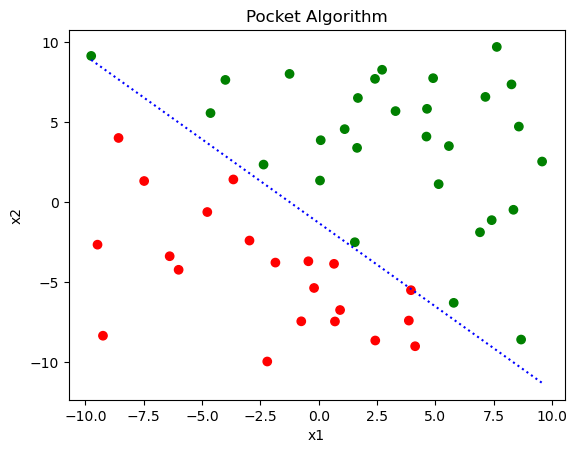

In [4]:
w = np.zeros(X.shape[1])
w_pocket = w.copy()
best_mis = np.inf

for i in range(max_iter):
    cur_mis, w = pla(X, y, w, 1)
    if cur_mis < best_mis:
        w_pocket = w.copy()
        best_mis = cur_mis
    if best_mis == 0:
        break

print("Final Weight Vector (Pocket Algorithm):", w_pocket)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "green"))(y))
x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision_pocket = (-w_pocket[1] * x_decision - w_pocket[0]) / w_pocket[2]
plt.plot(x_decision, y_decision_pocket, linestyle="dotted", color="blue")
plt.title("Pocket Algorithm")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()